In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split



In [57]:
dataset_path='insurance.csv'
df=pd.read_csv(dataset_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
df.shape

(1338, 7)

In [59]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
y=df['charges']

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

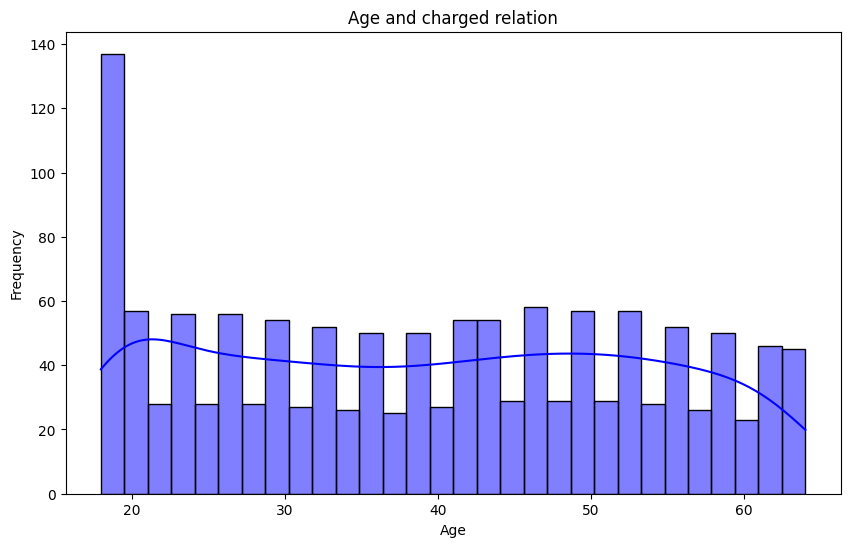

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age and charged relation')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

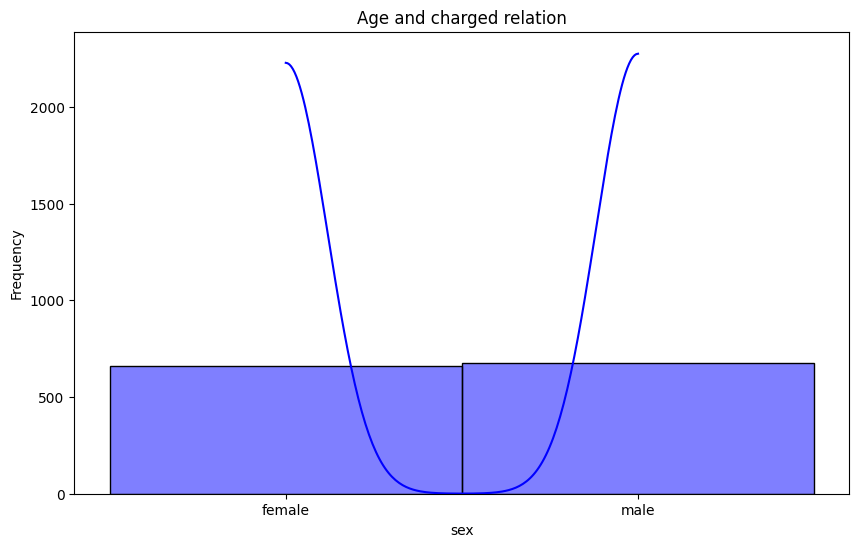

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sex'], bins=30, kde=True, color='blue')
plt.title('Age and charged relation')
plt.xlabel('sex')
plt.ylabel('Frequency')

plt.show()

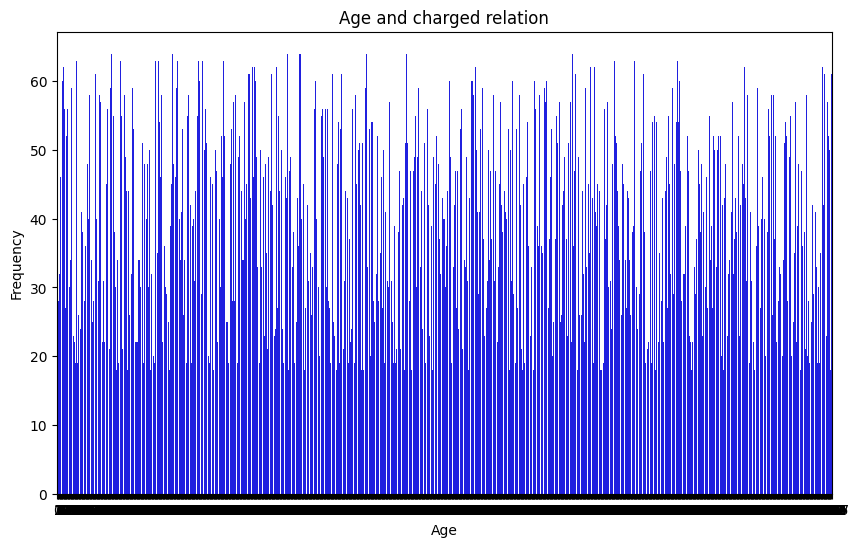

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['age'], color='blue')
plt.title('Age ')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

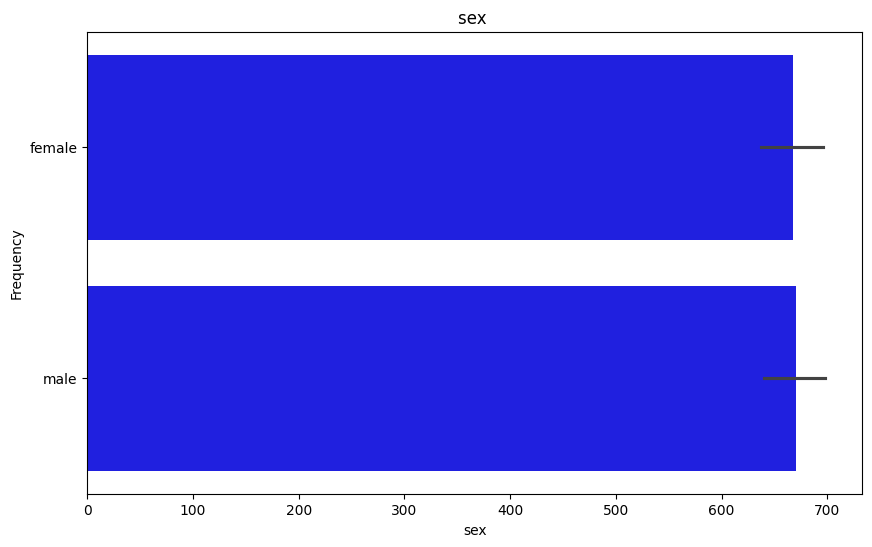

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['sex'], color='blue')
plt.title('sex ')
plt.xlabel('sex')
plt.ylabel('Frequency')

plt.show()

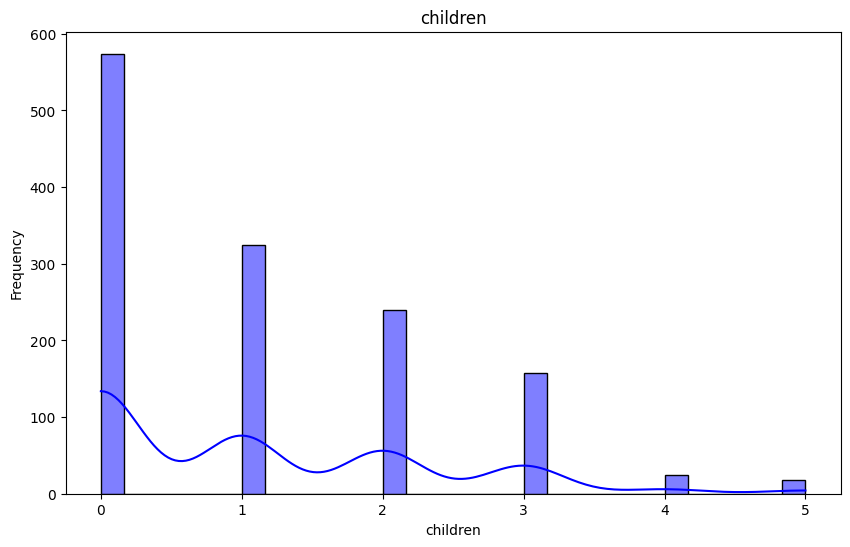

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['children'], bins=30, kde=True, color='blue')
plt.title('children')
plt.xlabel('children')
plt.ylabel('Frequency')

plt.show()

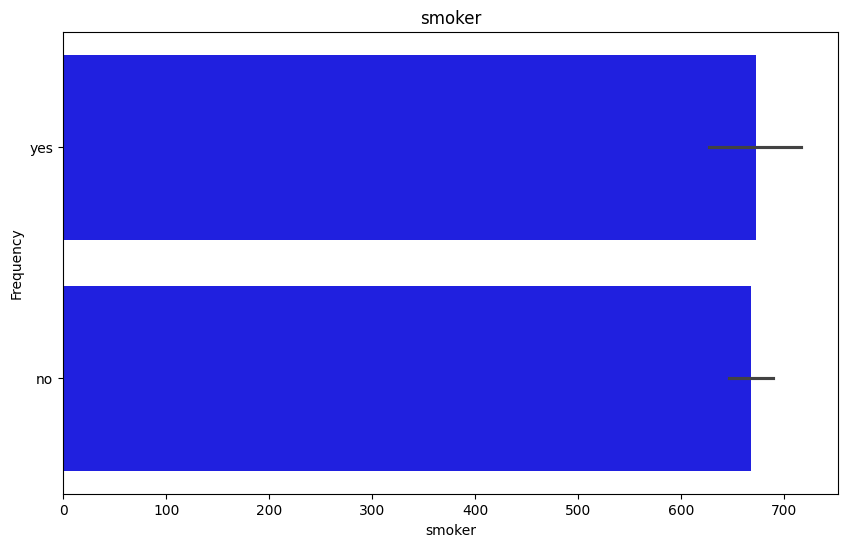

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['smoker'], color='blue')
plt.title('smoker')
plt.xlabel('smoker')
plt.ylabel('Frequency')

plt.show()

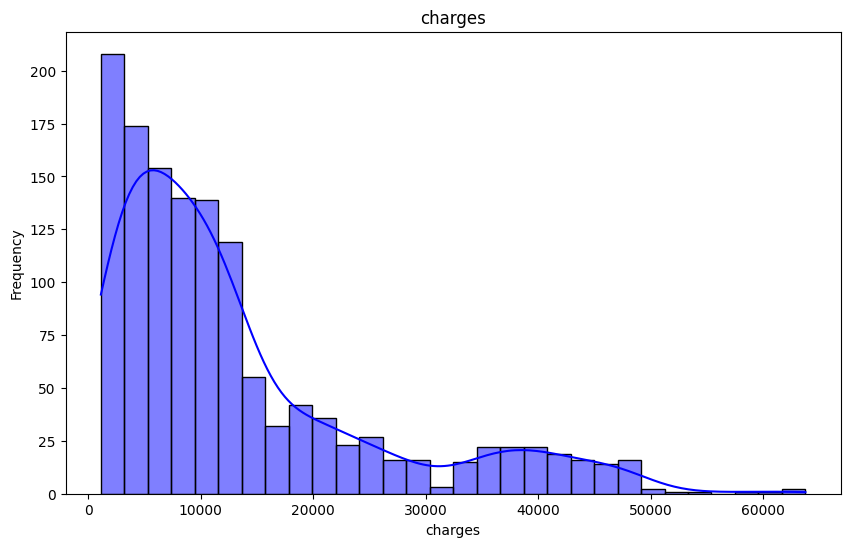

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'],  kde=True, color='blue')
plt.title('charges')
plt.xlabel('charges')
plt.ylabel('Frequency')

plt.show()

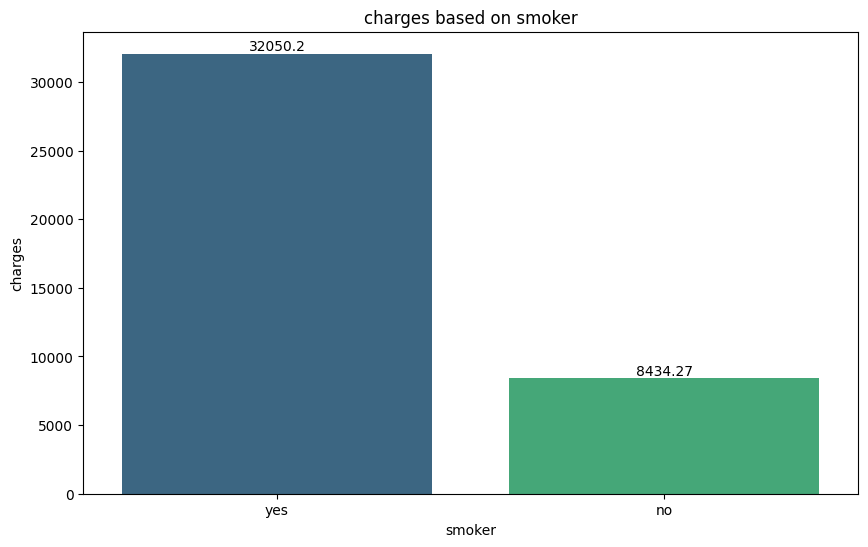

In [ ]:
plt.figure(figsize=(10, 6))
graph=sns.barplot(y='charges',x='smoker',hue='smoker',data=df,palette='viridis',errorbar=None)
plt.title('charges based on smoker')
plt.xlabel('smoker')
plt.ylabel('charges')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

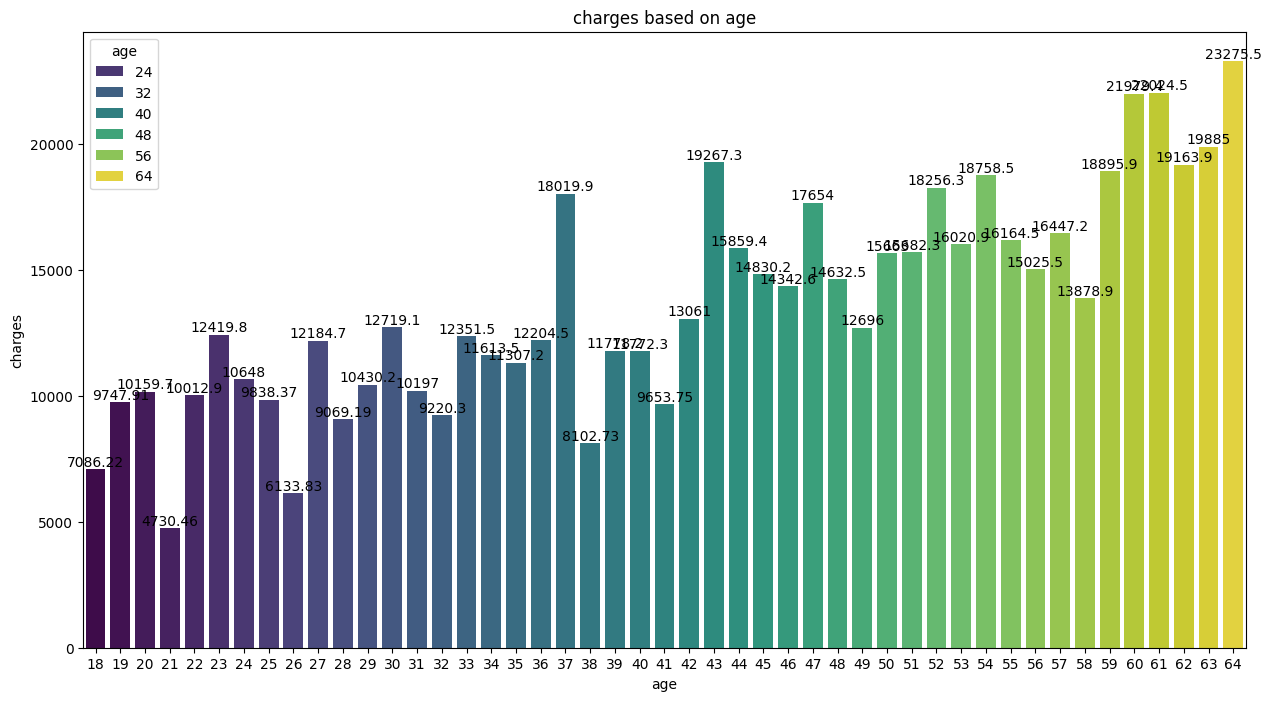

In [ ]:
plt.figure(figsize=(15, 8))
graph=sns.barplot(y='charges',x='age',hue='age',data=df,palette='viridis',errorbar=None)
plt.title('charges based on age')
plt.xlabel('age')
plt.ylabel('charges')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

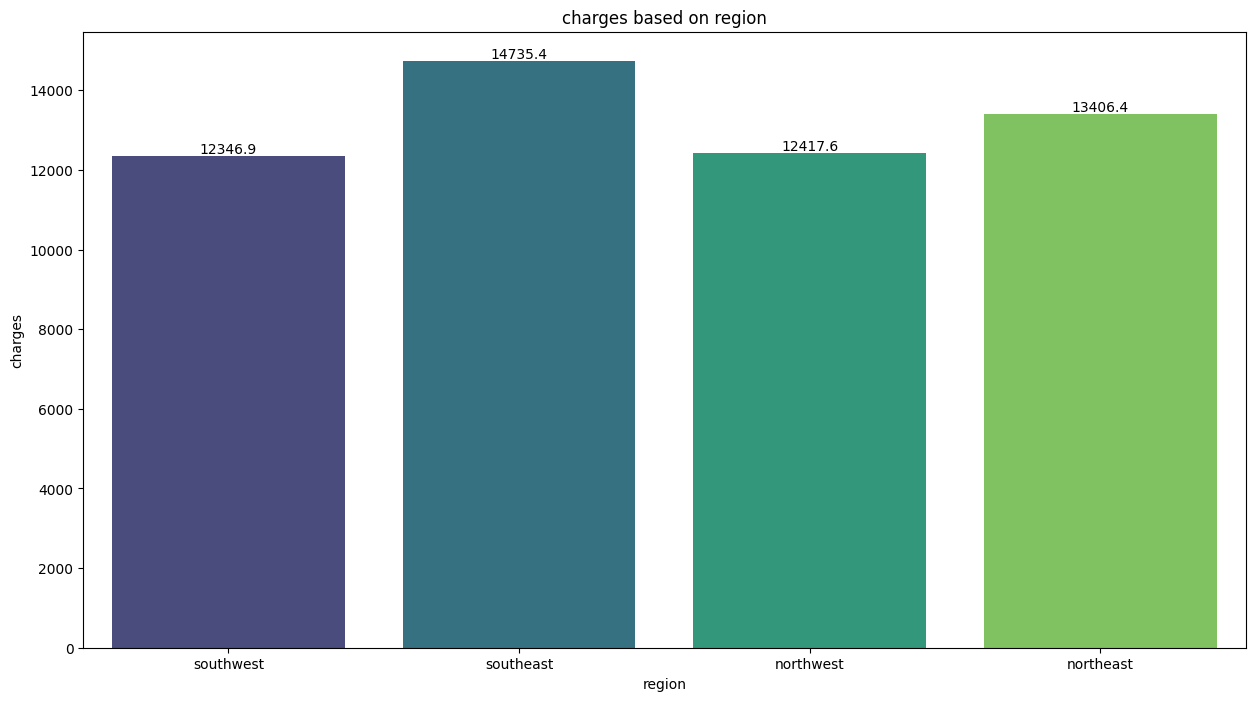

In [ ]:
plt.figure(figsize=(15, 8))
graph=sns.barplot(y='charges',x='region',hue='region',data=df,palette='viridis',errorbar=None)
plt.title('charges based on region')
plt.xlabel('region')
plt.ylabel('charges')

for container in graph.containers:
    graph.bar_label(container)

plt.show()

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0, 0.5, 'charges')

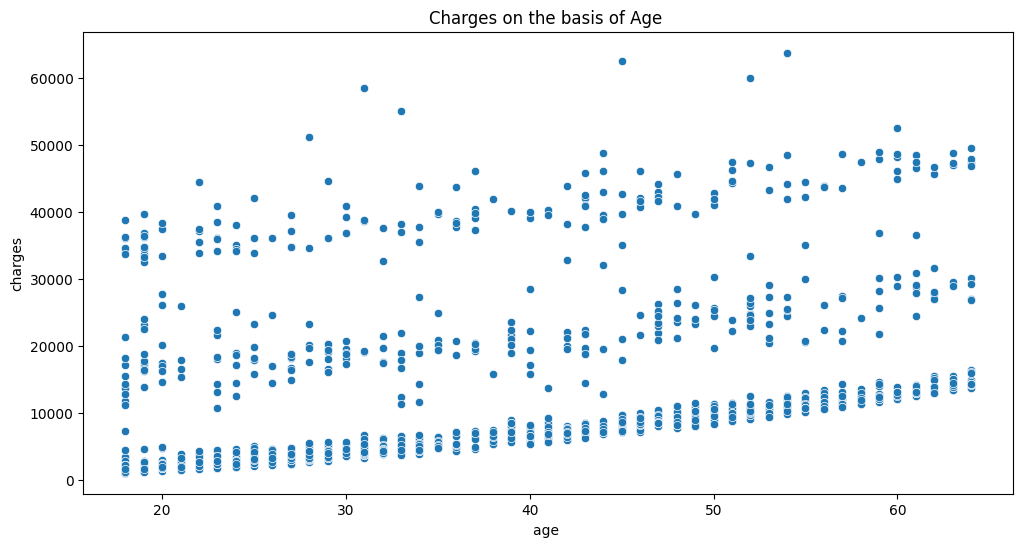

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='age',y='charges',data=df)
plt.title("Charges on the basis of Age ")
plt.xlabel('age ')
plt.ylabel('charges')


In [ ]:
southeast=df[df['region']=='southeast']
southeast

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
11,62,female,26.29,0,yes,southeast,27808.7251
...,...,...,...,...,...,...,...
1322,62,male,38.83,0,no,southeast,12981.3457
1323,42,female,40.37,2,yes,southeast,43896.3763
1327,51,male,30.03,1,no,southeast,9377.9047
1330,57,female,25.74,2,no,southeast,12629.1656


Text(0, 0.5, 'charges')

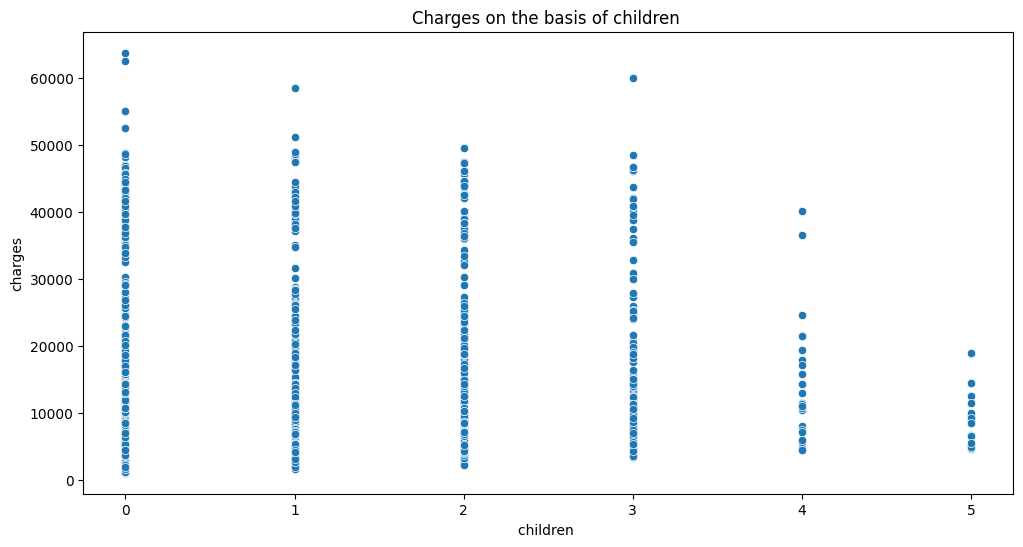

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='children',y='charges',data=df)
plt.title("Charges on the basis of children ")
plt.xlabel('children ')
plt.ylabel('charges')


Text(0, 0.5, 'charges')

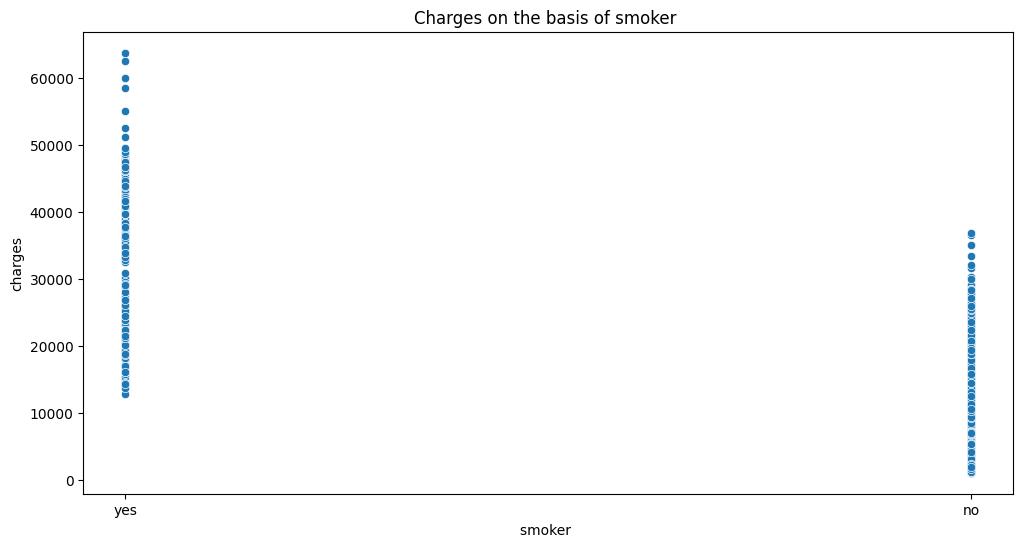

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='smoker',y='charges',data=df)
plt.title("Charges on the basis of smoker ")
plt.xlabel('smoker ')
plt.ylabel('charges')


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

label_encoder = LabelEncoder()

df['smoker'] = label_encoder.fit_transform(df['smoker'])
print(label_encoder.classes_)

df['age'] = label_encoder.fit_transform(df['age'])
print(label_encoder.classes_)

df['sex'] = label_encoder.fit_transform(df['sex'])
print(label_encoder.classes_)

df['region'] = label_encoder.fit_transform(df['region'])
print(label_encoder.classes_)




X = df[['smoker']]
y = df['charges']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute error:",metrics.mean_absolute_error(y_test,model.predict(X_test)))
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")





[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
[0 1]
[0 1 2 3]
Mean absolute error: 5625.810656140092
Mean Squared Error: 52745964.72752624
R-squared: 0.6602486589056529


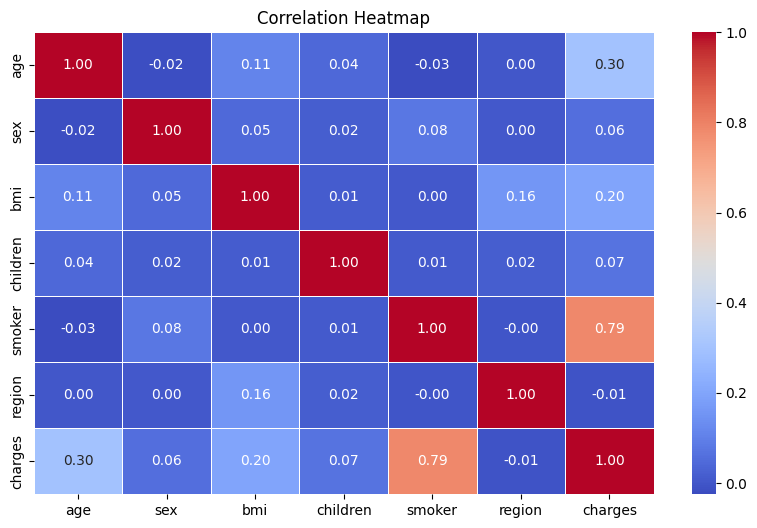

In [64]:
df= df[['age', 'sex', 'bmi','children','smoker','region','charges']]
correlation_matrix =df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

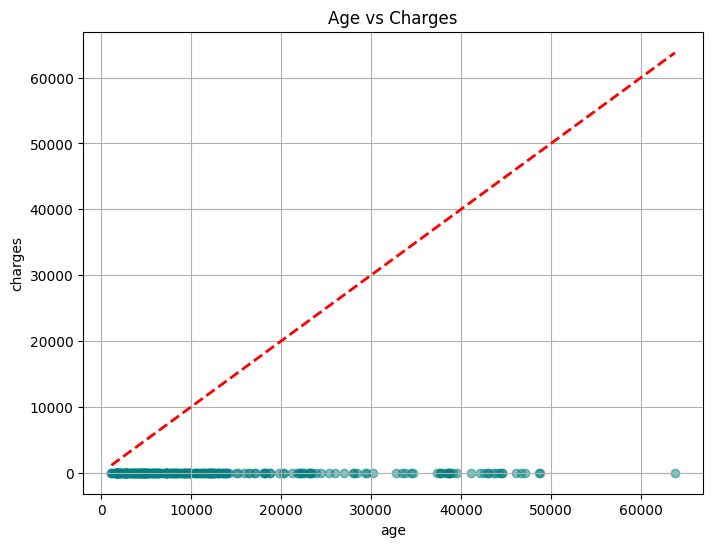

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,X_test,alpha=0.5,color='teal')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',linewidth=2)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')
plt.grid(True)
plt.show()